## Exercise 1a
#### Machine Learning - Winter Semester 2020/2021 Exercise 1a
##### Catherine Knobloch & Julia Siegl

### 1. Monte-Carlo Simulation

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn

#### 1.1 Data Creation and Visualization

To use a inverse transform sampling, one needs to find the inverse of the integrated likelyhood functions. For this, one integrates the functions: 
\begin{equation}
   D(X = x|Y = 0) = \int 2-2x \ dx = 2x- x^2 + c
\end{equation}
and 
\begin{equation}
   D (X = x|Y = 1)= \int 2x \ dx = x^2 + c
\end{equation}

One can ignore c, because D(...) will be choosen random between 0 and 1 so includes the c.
Now simply converts the functions to x. This gives:
\begin{equation}
    x = 1 \pm \sqrt(1 - D),  \ if \ Y= 0
\end{equation}
and 
\begin{equation}
    x = \pm \sqrt(D)  , \ if  \ Y= 1.
\end{equation}
Therefore one first needs to randomly choose Y (since probablities = 1/2) and then use the corresponding equation to determine x.

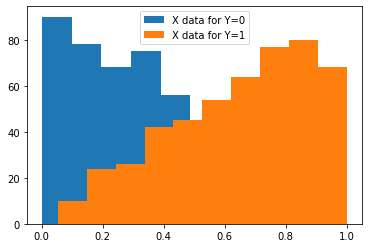

In [13]:
def create_data(N): # create a data set of length N
    Y=np.random.randint(2, size=N)
    x=np.random.rand(N)
    X=np.empty(N)
    X[Y==0]=1-(1-x[Y==0])**0.5
    X[Y==1]=np.sqrt(x[Y==1])
    return [X, Y]

[X,Y]=create_data(1000)
plt.hist(X[Y==0], label='X data for Y=0') # plot a histogram for the X data
plt.hist(X[Y==1], label='X data for Y=1')
plt.legend(loc='upper center')

<span style ='color:green;font-weight:bold'> Changes that should be made: 
    - to make it a bit faster, **0.5 should be changes to np.sqrt() or math.sqrt()  
    - Two subplots should be shown, each with a distribution  
    - For the histograms, density should be set to True, as this discribed a density distibution and we want it "normalized"  
    - Appropriate titles and axis label should be added  
    - Should check that the amount of the amount of data for Y=0 and Y=1 is approximately the same  
    - In total the code for the data creation is essentially the same as the solution code  
    - What is missing: Comparision of the Cumulative distribution function (theoretical vs measured throught the create data), however from the problem sheet I believe that the problem sheet did not explicitly say that this must be done (only checking the distribution of the data was required) </span > 

#### 1.2. Classification by Threshold

In [25]:
# define Rule A
def Rule_A(N, x_t, X, Y):
    Y_head=np.where(X<x_t,0,1)
    return Y_head

# define Rule B
def Rule_B(N, x_t, X, Y):
    Y_head=np.where(X>=x_t,0,1)
    return Y_head

# define function to determine error, true, and total N
def error(Y,Y_head):
    N=len(Y)
    if len(Y)!=len(Y_head): # make sure the two datasets being compared have the same size
        return print('Error could not be calculated because Y and Y_head do not have same length!')
    count = np.sum(Y==Y_head) # number of correct predictions
    true_rate=count/N
    error_rate=1-true_rate
    return true_rate, error_rate, N

The predicted error rates for Rule A are:  [0.34 0.25 0.26]
The predicted error rates for Rule B are:  [0.66 0.75 0.74]


The current Threshold is at  0.2
   The current set size is  10
      Rule A: mean= 0.32   std= 0.16
      Rule B: mean= 0.68   std= 0.16

   The current set size is  100
      Rule A: mean= 0.35   std= 0.062
      Rule B: mean= 0.65   std= 0.062

   The current set size is  1000
      Rule A: mean= 0.342   std= 0.014
      Rule B: mean= 0.658   std= 0.014

   The current set size is  10000
      Rule A: mean= 0.34   std= 0.005
      Rule B: mean= 0.66   std= 0.005

The current Threshold is at  0.5
   The current set size is  10
      Rule A: mean= 0.16   std= 0.102
      Rule B: mean= 0.84   std= 0.102

   The current set size is  100
      Rule A: mean= 0.272   std= 0.037
      Rule B: mean= 0.728   std= 0.037

   The current set size is  1000
      Rule A: mean= 0.245   std= 0.01
      Rule B: mean= 0.755   std= 0.01

   The current set size is  10000
      Rule 

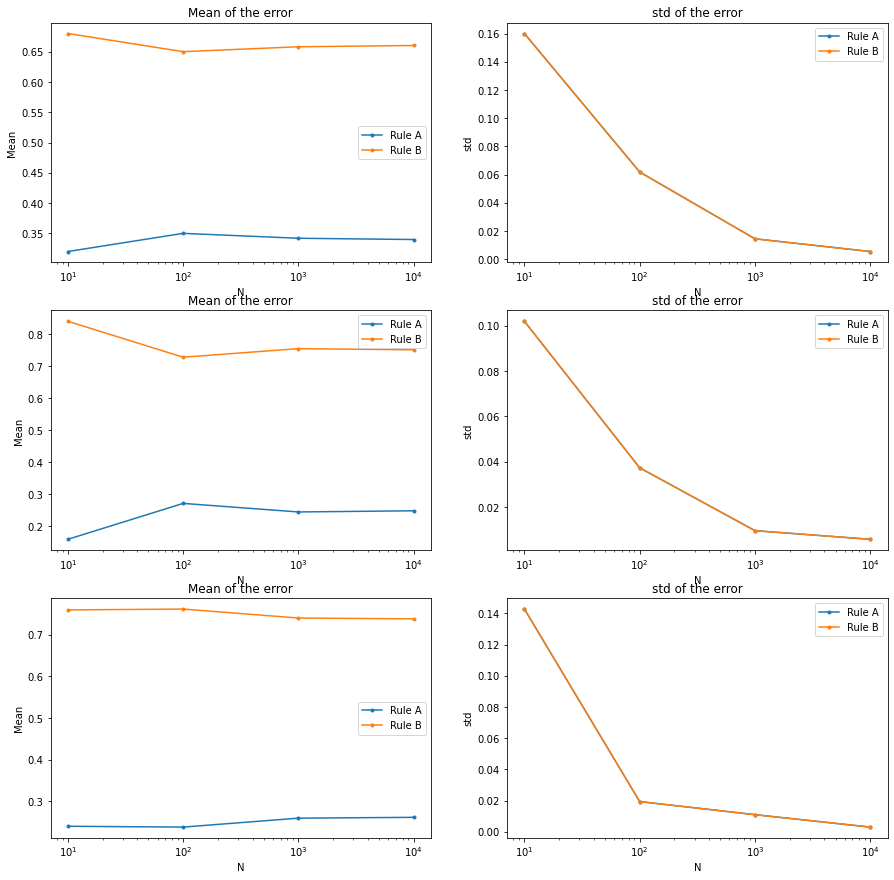

In [26]:
x_t = np.array([0.2,0.5,0.6]) # threshold values
len_x_t=len(x_t)

# predicted rates
p_A = 1/4+(x_t-1/2)**2
p_B = 3/4-(x_t-1/2)**2

print('The predicted error rates for Rule A are: ', p_A)
print('The predicted error rates for Rule B are: ', p_B)
print('')
print('')

N=np.array([10, 100, 1000, 10000]) # dataset size
n=len(N)
sets=10

# initialize arrays
error_rate_A=np.empty(sets)
error_rate_B=np.empty(sets)
error_mean_A=np.empty(n)
error_std_A=np.empty(n)
error_mean_B=np.empty(n)
error_std_B=np.empty(n)

fig, axs=plt.subplots(len_x_t,2)
fig.set_figheight(15)
fig.set_figwidth(15)

for xx in range(len_x_t):
    print('The current Threshold is at ', x_t[xx])
    for jj in range(n):
        print('   The current set size is ', N[jj])
        for ii in range(sets):
            [X,Y] = create_data(N[jj]) # create dataset
            Y_head_A=Rule_A(N[jj], x_t[xx], X, Y) # calculate Y_head for Rule A and the error rate
            [true_rate_A, error_rate_A[ii], N_A] = error(Y, Y_head_A)
            Y_head_B=Rule_B(N[jj], x_t[xx], X, Y) # calculate Y_head for Rule B and the error rate
            [true_rate_B, error_rate_B[ii], N_B] = error(Y, Y_head_B)
            
        # calculate mean and std of error for Rule A and B
        error_mean_A[jj]=np.mean(error_rate_A)
        error_std_A[jj]=np.std(error_rate_A)
        print('      Rule A: mean=', round(error_mean_A[jj],3), '  std=', round(error_std_A[jj],3))
        error_mean_B[jj]=np.mean(error_rate_B)
        error_std_B[jj]=np.std(error_rate_B)
        print('      Rule B: mean=', round(error_mean_B[jj],3), '  std=', round(error_std_B[jj],3))
        print('')
        
    # plot mean of error and std of error (in figure for std, the overlap)
    axs[xx,0].plot(N, error_mean_A, linestyle='-', marker='.', label='Rule A')
    axs[xx,0].plot(N, error_mean_B, linestyle='-', marker='.', label='Rule B')
    axs[xx,0].set_xscale('log')
    axs[xx,0].set_xlabel('N')
    axs[xx,0].set_ylabel('Mean')
    axs[xx,0].set_title('Mean of the error')
    axs[xx,0].legend()
    axs[xx,1].plot(N, error_std_A, linestyle='-', marker='.', label='Rule A')
    axs[xx,1].plot(N, error_std_B, linestyle='-', marker='.', label='Rule B')
    axs[xx,1].set_title('std of the error')
    axs[xx,1].set_xscale('log')
    axs[xx,1].set_xlabel('N')
    axs[xx,1].set_ylabel('std')
    axs[xx,1].legend()

There is a exponential decrease of the std of the error. Additionally, the std is the same for Rule A and Rule B.

The mean of the error converges. The higher the threshold the smaller the error for Rule A (vice versa for Rule B).

In [106]:
# Again for threshole x_t=0.5
x_t_Bayes=0.5
N=10000

# Rule A
[X,Y] = create_data(N)
Y_head_A=Rule_A(N, x_t_Bayes, X, Y)
[true_rate_A, error_rate_A, N_A] = error(Y, Y_head_A)
print('For Rule A the error rate is ', error_rate_A)

# Rule B
Y_head_B=Rule_B(N, x_t_Bayes, X, Y)
[true_rate_B, error_rate_B, N_B] = error(Y, Y_head_B)
print('For Rule B the error rate is ', error_rate_B)

For Rule A the error rate is  0.23650000000000004
For Rule B the error rate is  0.7635000000000001


For the optimal Bayes classifier an overall error of 25% is achieved.

<span style ='color:green;font-weight:bold'> Changes that should be made:  
    - In the function that determines the error, only the error should be calculated so that it is more efficient  
    - The calculation of the mean and std are essentially the same. It might seem as though there is one for loop more in this code, however this code does not have a loop in the error function. However, in generall, the code could be more elegant as currently it is very long.  
    - A better overview of the mean and std could be done as in the solution code.  
    - The plot of the mean over M was not asked for.  
    - Plotting the std for all thresholds in one figure would make it easier to compare.  
    - Should also plot the mean over the threshold in order to show how the error changes with the threshold to better show that the minimum is at 0.5 and that Rule A is better  
    - It is unnecessary to recalculate the error for threshold = 0.5 </span >

#### 1.3 Baseline Classifiers

In [30]:
# define Rule C
def Rule_C(N):
    Y_head=np.random.randint(2, size=N)
    return Y_head

def Rule_D(N):
    Y_head=np.ones(N)
    return Y_head

The current Threshold is at  0.2
   The current set size is  10
      Rule C: mean= 0.49   std= 0.122
      Rule D: mean= 0.51   std= 0.158

   The current set size is  100
      Rule C: mean= 0.517   std= 0.026
      Rule D: mean= 0.51   std= 0.08

   The current set size is  1000
      Rule C: mean= 0.5   std= 0.022
      Rule D: mean= 0.501   std= 0.014

   The current set size is  10000
      Rule C: mean= 0.502   std= 0.005
      Rule D: mean= 0.502   std= 0.004

The current Threshold is at  0.5
   The current set size is  10
      Rule C: mean= 0.53   std= 0.215
      Rule D: mean= 0.5   std= 0.1

   The current set size is  100
      Rule C: mean= 0.494   std= 0.061
      Rule D: mean= 0.504   std= 0.043

   The current set size is  1000
      Rule C: mean= 0.502   std= 0.012
      Rule D: mean= 0.497   std= 0.014

   The current set size is  10000
      Rule C: mean= 0.499   std= 0.005
      Rule D: mean= 0.5   std= 0.004

The current Threshold is at  0.6
   The current set siz

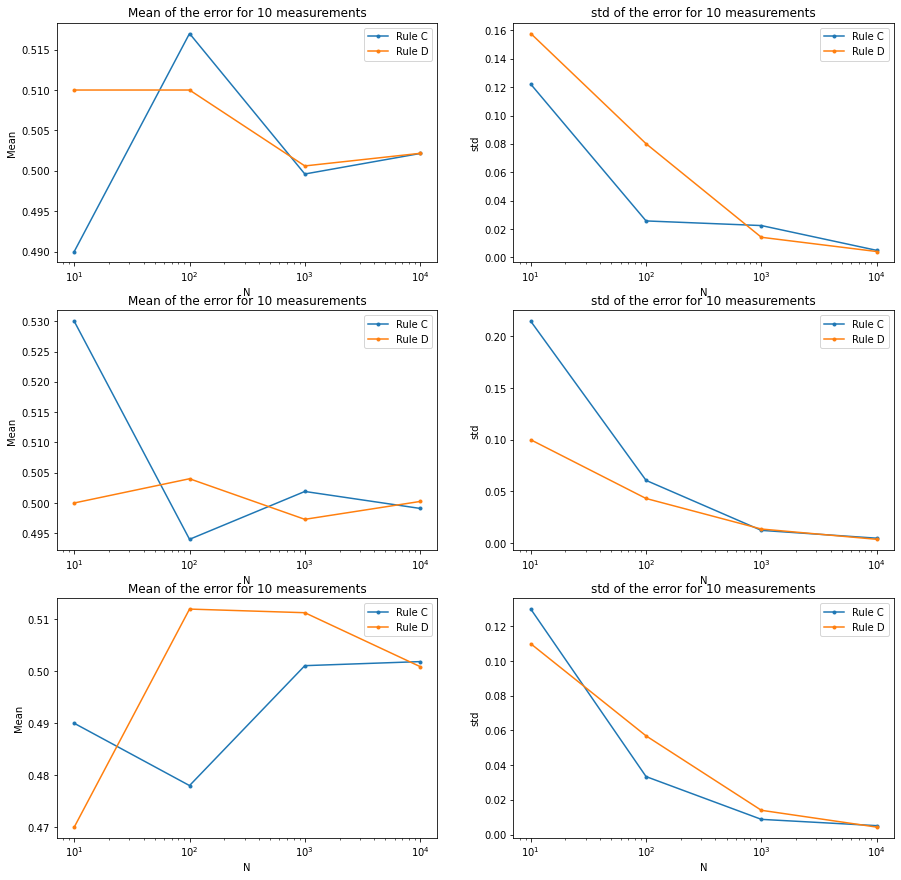

In [31]:
N=np.array([10, 100, 1000, 10000])
n=len(N)
sets=10

# initialize arrays
error_rate_C=np.empty(sets)
error_rate_D=np.empty(sets)
error_mean_C=np.empty(n)
error_std_C=np.empty(n)
error_mean_D=np.empty(n)
error_std_D=np.empty(n)

fig, axs=plt.subplots(len_x_t,2)
fig.set_figheight(15)
fig.set_figwidth(15)

for xx in range(len_x_t):
    print('The current Threshold is at ', x_t[xx])
    for jj in range(n):
        print('   The current set size is ', N[jj])
        for ii in range(sets):
            [X,Y] = create_data(N[jj]) # create data
            Y_head_C=Rule_C(N[jj]) # calculate Y_head for Rule C and the error rate
            [true_rate_C, error_rate_C[ii], N_C] = error(Y, Y_head_C)
            Y_head_D=Rule_D(N[jj]) # calculate Y_head for Rule D and the error rate
            [true_rate_D, error_rate_D[ii], N_D] = error(Y, Y_head_D)

        error_mean_C[jj]=np.mean(error_rate_C)
        error_std_C[jj]=np.std(error_rate_C)
        print('      Rule C: mean=', round(error_mean_C[jj],3), '  std=', round(error_std_C[jj],3))
        error_mean_D[jj]=np.mean(error_rate_D)
        error_std_D[jj]=np.std(error_rate_D)
        print('      Rule D: mean=', round(error_mean_D[jj],3), '  std=', round(error_std_D[jj],3))
        print('')
    axs[xx,0].plot(N, error_mean_C, linestyle='-', marker='.', label='Rule C')
    axs[xx,0].plot(N, error_mean_D, linestyle='-', marker='.', label='Rule D')
    axs[xx,0].set_xscale('log')
    axs[xx,0].set_xlabel('N')
    axs[xx,0].set_ylabel('Mean')
    axs[xx,0].set_title('Mean of the error for 10 measurements')
    axs[xx,0].legend()
    axs[xx,1].plot(N, error_std_C, linestyle='-', marker='.', label='Rule C')
    axs[xx,1].plot(N, error_std_D, linestyle='-', marker='.', label='Rule D')
    axs[xx,1].set_title('std of the error for 10 measurements')
    axs[xx,1].set_xscale('log')
    axs[xx,1].set_xlabel('N')
    axs[xx,1].set_ylabel('std')
    axs[xx,1].legend()

The diagrams show that the error for Rule C and D converges towards 50%. 

<span style ='color:green;font-weight:bold'> Changes that should be made:  
    - The first 4 bullet points from the previous task are also applicable here 
    - Since the thresholds do not play a role for Rule C and D, do not need to loop over the thresholds.
    </span >

#### 1.4. Nearest Neighbor Classification

In [42]:
def nearest_neightbor(X_train, Y_train, X_test):
    #for each X_train to each  X_test sample, calculate euklidean norm, and return Y of smallest distance
    Y_test_predict =np.zeros(len(X_test))
    
    for i in range (len(X_test)):
        idx = np.array([np.linalg.norm(x-X_test[i]) for (x) in X_train]).argmin()
        Y_test_predict[i]= Y_train[idx]
        
    return Y_test_predict
    #distance[i][j] = X_train[i] - X_test[j]
    
def mes_error_nn(Y_test,Y_test_predict):
    error = sum(np.sqrt((Y_test-Y_test_predict)**2))/len(Y_test_predict)
    return error

def repeat_NN(N, m): # number training size, number different trainings sets
    errors=[]
    i=0
    X_test, Y_test = create_data (100) #sufficiently large
    
    while i<=m:
        X_train, Y_train = create_data (N)
        if (0) in Y_train:
            if (1) in Y_train:
                Y_test_predict=nearest_neightbor(X_train, Y_train, X_test)
                errors.append(mes_error_nn(Y_test,Y_test_predict))
                i+=1
                
    errors=np.array(errors)
    
    return errors.mean(), errors.var()

In [43]:
mean, var= repeat_NN(2,100)

print('mean=',mean)
print('std=',var)

mean= 0.36386138613861385
std= 0.026534594647583565


The error for nearest neighbor is 36% for 100 datapoints in a set.

If only 100 datasets with each 2 values are chosem the mean error rate is 0.

<span style ='color:green;font-weight:bold'> Changes that should be made:  
    - Use larger test set     
    - but train features and labels in single array    
    - in sample solution the nn classifier only takes 1 test sample - here a whole set of test samples is expected     
     - instead of using the created function to create data in the sample solution, they again implemented it with stating
    once Y=0 once Y=1. I am not sure which process I prefere - our can take several function calls to obtain the conditon and is not easily translateable to balanced data ( also missundersood that)      
    - in gerneral if creating N= 50 training data with Y only 2 possible values it will be in gerneral balanced     
    - I prefer vectorized form of error estimation , but of course if more classes not possible like that     
    - we did not really evaluate for N>2   
    </span >